<a href="https://colab.research.google.com/github/nattygirma/ML-concepts/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import torch

In [184]:
import random
weight = 3
bias = 2

start = -5
end = 5
X = torch.arange(start,end,0.1).unsqueeze(dim=1)
Y = weight * X + bias + random.random()
Y1 = weight * X + bias
print(Y[:10])
print(Y1[:10])

tensor([[-12.0128],
        [-11.7128],
        [-11.4128],
        [-11.1128],
        [-10.8128],
        [-10.5128],
        [-10.2128],
        [ -9.9128],
        [ -9.6128],
        [ -9.3128]])
tensor([[-13.0000],
        [-12.7000],
        [-12.4000],
        [-12.1000],
        [-11.8000],
        [-11.5000],
        [-11.2000],
        [-10.9000],
        [-10.6000],
        [-10.3000]])


In [185]:
train_split = int(0.8 * len(X))

X_train = X[:train_split]
Y_train = Y[:train_split]
X_test = X[train_split:]
Y_test = Y[train_split:]


In [186]:
import random
class LinearRegression(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = torch.nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = torch.nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
  def forward(self,x):
    return self.weights * x + self.bias

torch.manual_seed(42)
# Initialize model, loss function, and optimizer
model = LinearRegression()
model.state_dict()
loss_fn = torch.nn.L1Loss()  # Mean Squared Error Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent


In [187]:
# Training loop
epochs = 500
train_losses, test_losses = [], []
epoch_count = []

for epoch in range(epochs):

    # Training
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)  # Add a dimension for batch size
    loss = loss_fn(y_pred, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    epoch_count.append(epoch)

    # Validation
    model.eval()
    with torch.inference_mode():
        test_outputs = model(X_test)
        test_loss = loss_fn(test_outputs, Y_test.type(torch.float))
        test_losses.append(test_loss.detach().numpy())

        if (epoch + 1) % 50 == 0:


          print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {loss}, test Loss: {test_loss}")

Epoch [50/500], Train Loss: 3.522350788116455, test Loss: 9.562098503112793
Epoch [100/500], Train Loss: 2.279337167739868, test Loss: 6.403986930847168
Epoch [150/500], Train Loss: 1.8508827686309814, test Loss: 4.833631992340088
Epoch [200/500], Train Loss: 1.5694780349731445, test Loss: 4.068418502807617
Epoch [250/500], Train Loss: 1.289089560508728, test Loss: 3.335622787475586
Epoch [300/500], Train Loss: 1.0087015628814697, test Loss: 2.602828025817871
Epoch [350/500], Train Loss: 0.7283127307891846, test Loss: 1.870031714439392
Epoch [400/500], Train Loss: 0.4479266107082367, test Loss: 1.1409306526184082
Epoch [450/500], Train Loss: 0.1675531417131424, test Loss: 0.4192293584346771
Epoch [500/500], Train Loss: 0.02739812806248665, test Loss: 0.03359704092144966


In [177]:
import matplotlib.pyplot as plt

In [188]:
# Get the learned parameters
w_learned = model.weights.item()
b_learned = model.bias.item()
print(f"Learned Parameters: w = {w_learned:.4f}, b = {b_learned:.4f}")
print(f"Ground Truth: w = 3.0, b = 2.0")


Learned Parameters: w = 2.9912, b = 2.9883
Ground Truth: w = 3.0, b = 2.0


Text(0, 0.5, 'y')

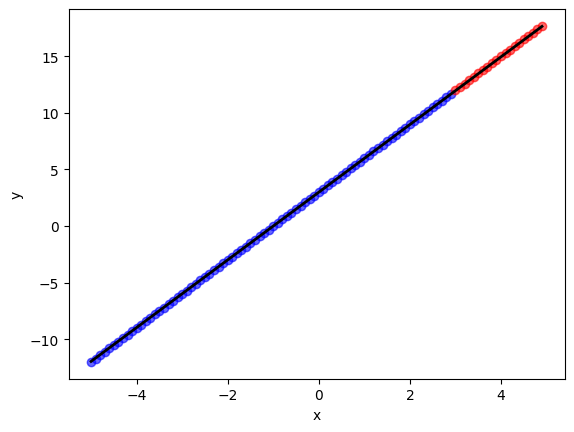

In [190]:
model.eval()
with torch.no_grad():
    y_pred = model(X)  # Change: Use X_test for predictions to match the size of y_pred
    y_pred = y_pred.squeeze(1)  # Change: Squeeze dimensions of y_pred
plt.scatter(X_train, Y_train, label="Training Data", color="blue", alpha=0.6)
plt.scatter(X_test, Y_test, label="Validation Data", color="red", alpha=0.6)  # Now X_test and y_pred have compatible sizes
plt.plot(X, y_pred, label="Fitted Line", color="black", linewidth=2) # Predict on X to get full line
plt.xlabel("x")
plt.ylabel("y")

In [180]:
len(train_losses)

500

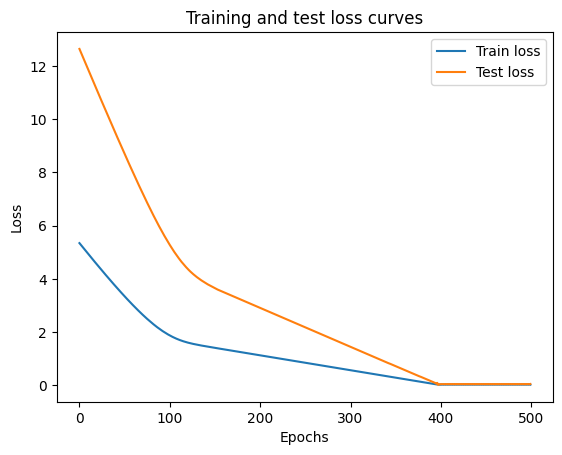

In [181]:

plt.plot(epoch_count, train_losses, label="Train loss")
plt.plot(epoch_count, test_losses, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()